###  Modelling using Linear Regression  

# Regression
1. [Definition](#section1)<br>
2. [Simple Linear Regression](#section2)
3. [Multiple Linear Regression](#section3)


 

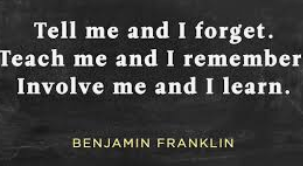

<a id=section1></f>
## Definition


Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables.
- Simple Linear Regression

Simple linear regression is an approach for predicting a response using a single feature.
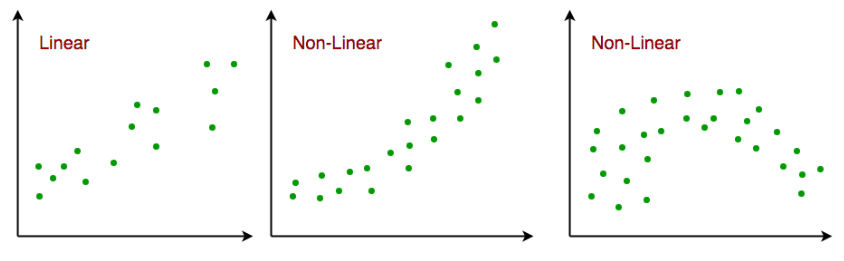

#### WHY Linear Regression?
- To find the parameters so that the model **best fits** the data.
- Forecasting an effect
- Determing a Trend
#### How do we determine the best fit line? 
- The line for which the the error between the **predicted** values and the **observed** values is minimum is called the best fit line or the regression line. These errors are also called as **residuals**. 
- The residuals can be visualized by the vertical lines from the observed data value to the **regression line**.

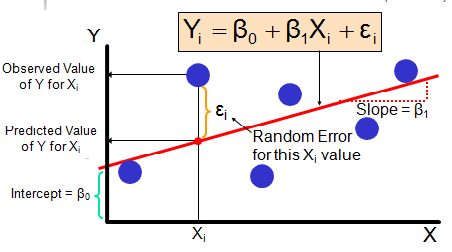



<a id=section2></f>
## Simple Linear Regression


- Lets  assume that the two variables are linearly related. 
- Find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

- x = [9, 10, 11, 12, 10, 9, 9, 10, 12, 11]
- y = [10, 11, 14, 13, 15, 11, 12, 11, 13, 15]


x as feature vector, i.e x = [x_1, x_2, …., x_n],

y as response vector, i.e y = [y_1, y_2, …., y_n]

for n observations (in above example, n=10).

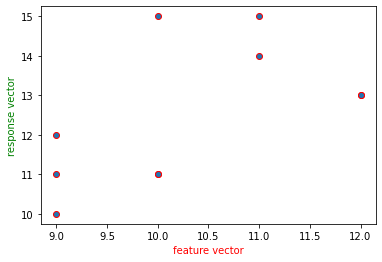

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
x = [9, 10, 11, 12, 10, 9, 9, 10, 12, 11]
y = [10, 11, 14, 13, 15, 11, 12, 11, 13, 15]

plt.scatter(x,y, edgecolors='r')
plt.xlabel('feature vector',color="r")
plt.ylabel('response vector',color="g")
plt.show()

- Now, the task is to find a line which fits best in above scatter plot so that we can predict the response for any new feature values. (i.e a value of x not present in dataset)
This line is called regression line.

The equation of regression line is represented as:

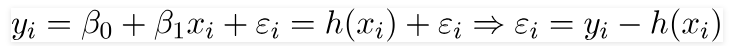

Here,

h(x<sub>i</sub>) represents the predicted response value for ith observation.
b(<sub>0</sub>) and b(<sub>1</sub>) are regression coefficients and represent y-intercept and slope of regression line respectively.

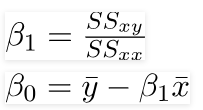
where (SS<sub>xx</sub>) is the sum of cross-deviations of y and x:

Estimated coefficients:
b_0 = 3.5619834710743117 \ 
b_1 = 0.8677685950413289


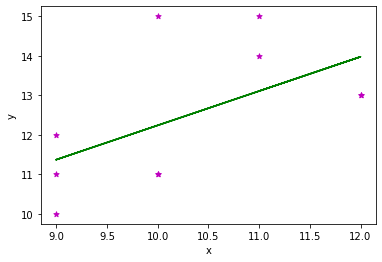

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

def estimate_coef(x, y): 
# number of observations/points 
 n = np.size(x) 

# mean of x and y vector 
 m_x, m_y = np.mean(x), np.mean(y) 

# calculating cross-deviation and deviation about x 
 SS_xy = np.sum(y*x) - n*m_y*m_x 
 SS_xx = np.sum(x*x) - n*m_x*m_x 
# calculating regression coefficients 
 b_1 = SS_xy / SS_xx 
 b_0 = m_y - b_1*m_x 
 return(b_0, b_1) 

def plot_regression_line(x, y, b): 
# plotting the actual points as scatter plot 
 plt.scatter(x, y, color = "m", marker = "*", s = 30) 

# predicted response vector 
 y_pred = b[0] + b[1]*x 

# plotting the regression line 
 plt.plot(x, y_pred, color = "g") 

# putting labels 
 plt.xlabel('x') 
 plt.ylabel('y') 

# function to show plot 
 plt.show() 

def main(): 
# observations 
 x =np.array([9, 10, 11, 12, 10, 9, 9, 10, 12, 11])
 y =np.array([10, 11, 14, 13, 15, 11, 12, 11, 13, 15])

# estimating coefficients 
 b = estimate_coef(x, y) 
 print("Estimated coefficients:\nb_0 = {} \ \nb_1 = {}".format(b[0], b[1])) 
 
# plotting regression line 
 plot_regression_line(x, y, b) 

if __name__ == "__main__": 
 main() 


In [ ]:
Profit = Sales(B1)+ Year(B2)+ tYpe(B3)+B0

Target vector= Profit
Feature = Sales, Year, Type 

<a id=section3></f>
## Multiple linear regression


Multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data.

Clearly, it is nothing but an extension of Simple linear regression.

Consider a dataset with p features(or independent variables) and one response(or dependent variable).
Also, the dataset contains n rows/observations.
The regression line for p features is represented as:
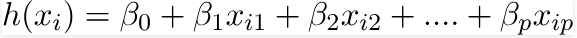
where h(x_i) is predicted response value for ith observation and b_0, b_1, …, b_p are the regression coefficients.

### Scikit -Learn
 - A library for machine learning for python language
 - Contains tools for machine learning algorithm and stats modelling
 
#### Installation
- conda install scikit-learn

### link to download pandas profiling module:
conda install -c conda-forge pandas-profiling 

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
##import pandas_profiling

In [6]:
c_data=pd.read_csv("FuelConsumption.csv")

In [22]:
c_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [8]:
c_data.shape

(1067, 13)

In [10]:
c_data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [40]:
## drop down following : the model name, the geographical origin and the year that the model was built. 
#c_data = c_data.drop(['name','origin','model_year'], axis=1)
#X = c_data.drop('mpg', axis=1)
#y = c_data[['mpg']]
X1=c_data.drop(["CO2EMISSIONS"],axis=1)

X=c_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB_MPG','FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB']]
y=c_data[['CO2EMISSIONS']]

- Modelling: (X_train, Y_train)
- Ypred=X_test 
- Ytest=Yactual
- Ypred-Yactual(ERROR)

In [43]:
## we’ll split the dataset into a train set and a test set. 
## Scikit-learn has a very straightforward train_test_split function for that.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                  random_state=1)

###  Feature Importance for selection
One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. 

The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

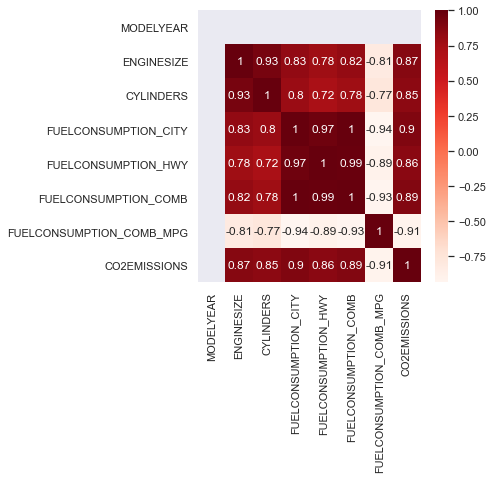

In [30]:
#Using Pearson Correlation
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
plt.figure(figsize=(5,5))
cor = c_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [31]:
#Correlation with output variable
cor_target = abs(cor["CO2EMISSIONS"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

ENGINESIZE                  0.874154
CYLINDERS                   0.849685
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_HWY         0.861748
FUELCONSUMPTION_COMB        0.892129
FUELCONSUMPTION_COMB_MPG    0.906394
CO2EMISSIONS                1.000000
Name: CO2EMISSIONS, dtype: float64

- We see that all the above features are highly correlated.We can consider all above features
- One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.

### Correlation of Selected features with each other

In [25]:
print(c_data[["CYLINDERS","ENGINESIZE"]].corr())


            CYLINDERS  ENGINESIZE
CYLINDERS    1.000000    0.934011
ENGINESIZE   0.934011    1.000000


### RFE (Recursive Feature Elimination)
The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [32]:
from sklearn.feature_selection import RFE
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 5)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False]
[1 1 1 1 1 2]


In [33]:
#no of features
nof_list=np.arange(1,6)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.843943


### Lets build the regression model. First, let’s try a model with only one variable.

In [34]:
reg = LinearRegression()
reg.fit(X_train[['CYLINDERS']], y_train)

LinearRegression()

In [35]:
print(reg.intercept_)  

[84.06597327]


In [36]:
print(reg.coef_)  

[[30.03846493]]


In [37]:
y_pred = reg.predict(X_test[['CYLINDERS']])

###  Evaluation metrics for linear regression are mean squared error and the R² score.

## Evaluating the Algorithm

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:

- **Mean Absolute Error (MAE) is the mean of the absolute value of the errors**
- **Mean Squared Error (MSE) is the mean of the squared errors**
- **Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors*

![image.png](attachment:image.png)

In [38]:

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
print('R²: %.2f' % r2_score(y_test, y_pred))

Mean Absolute Error: 27.658171170301756
Mean Squared Error: 1229.8145616894008
Root Mean Squared Error: 35.06871200499672
R²: 0.69


- Linear regression calculates an equation that minimizes the distance between the fitted line and all of the data points.
- R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.
- R-squared = Explained variation / Total variation

- R-squared is always between 0 and 100%:
0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.

### Insights

- The **best** possible score is **1.0**, We get a model with a mean squared error of **27** and an R² of**0.56**. Not so good

### Let’s add more variables to the model weight and cylinders(Multi)

In [44]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_predicted = reg.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))  
print('R²: %.2f' % r2_score(y_test, y_predicted))
#print("Mean squared error: %.2f" % mean_squared_error(y_test, y_predicted))


Mean Absolute Error: 14.650803776974183
Mean Squared Error: 478.96051367527565
Root Mean Squared Error: 21.88516652153407
R²: 0.88


In [ ]:
print(reg.coef_)

### Insights
- Now our Model is better as **R²= 0.67**

X_new=np.array([6,180,4603,21.5])
y_new=reg.predict(X_new)

## Performance Improvement by Cross validation
In this approach, we reserve 50% of the dataset for validation and the remaining 50% for model training. However, a major disadvantage of this approach is that since we are training a model on only 50% of the dataset, there is a huge possibility that we might miss out on some interesting information about the data which will lead to a higher bias

In [ ]:
from sklearn.model_selection import train_test_split  
train, validation = train_test_split(c_data, test_size=0.50, random_state = 5)

In [ ]:
X_train, X_v, y_train, y_v = train_test_split(X, y, test_size=0.5, random_state=5) 
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

In [ ]:
print(reg.intercept_)

In [ ]:
print(reg.coef_)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))  
print('R²: %.2f' % r2_score(y_test, y_predicted))
